In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Sakuragi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('hotel_bookings_data.csv')

# DATA PREPROCESSING

## Handling Missing Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# Checking missing values
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [5]:
# Replacing NULL values with 0 from 'children' column
df['children'] = df['children'].fillna(0)
# Replacing NULL values with Unknown from 'city' column
df['city'] = df['city'].fillna('Unknown')
# Replacing NULL values with 0 from 'agent' and 'company' column 
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

# Re-checking Missing values
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Fixing Data Type

In [6]:
# Float64 into int64
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

## Fixing Unsuitable Values

In [7]:
df.meal.value_counts()

meal
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: count, dtype: int64

In [8]:
# Replacing 'Undefined' with 'No Meal' from meal column
df['meal'] = df['meal'].replace(['Undefined'], 'No Meal')
df['meal'].value_counts()

meal
Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: count, dtype: int64

## Removing Unnecessary Data

In [9]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print('Data with 0 guest: {0} out of {1} all data'.format(df[df['total_guests'] == 0].shape[0], df.shape[0]))
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
print('Data with 0 night: {0} out of {1} all data'.format(df[df['stay_duration'] == 0].shape[0], df.shape[0]))

# Pick the necessary data
df_clean = df[(df['total_guests'] > 0) & (df['stay_duration'] > 0)]

print('before pre-processing:', df.shape[0])
print('after pre-processing:', df_clean.shape[0])

Data with 0 guest: 180 out of 119390 all data
Data with 0 night: 715 out of 119390 all data
before pre-processing: 119390
after pre-processing: 118565


In [10]:
dfc = df_clean.copy()

# Monthly Hotel Booking Analysis on Hotel Type

In [11]:
# creating an aggregation data by calculating the number of hotel bookings
hotel_arrival = dfc.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
hotel_arrival

,hotel,arrival_date_month,nunique,count
0,City Hotel,April,2,4917
1,City Hotel,August,2,7874
2,City Hotel,December,2,7554
3,City Hotel,February,2,4097
4,City Hotel,January,2,4309
5,City Hotel,July,2,8184
6,City Hotel,June,2,7458
7,City Hotel,March,2,3712
8,City Hotel,May,2,6411
9,City Hotel,November,2,7377


In [12]:
# changing the table columns
hotel_arrival.columns = ['hotel_variety', 'month_arrival', 'nunique_booking_year', 'booking_count']
hotel_arrival

,hotel_variety,month_arrival,nunique_booking_year,booking_count
0,City Hotel,April,2,4917
1,City Hotel,August,2,7874
2,City Hotel,December,2,7554
3,City Hotel,February,2,4097
4,City Hotel,January,2,4309
5,City Hotel,July,2,8184
6,City Hotel,June,2,7458
7,City Hotel,March,2,3712
8,City Hotel,May,2,6411
9,City Hotel,November,2,7377


In [13]:
# normalizing data to get the average number of bookings
hotel_arrival['average_hotel_booking'] = hotel_arrival['booking_count']/hotel_arrival['nunique_booking_year']
print(round(hotel_arrival['average_hotel_booking']))

0     2458.0
1     3937.0
2     3777.0
3     2048.0
4     2154.0
5     4092.0
6     3729.0
7     1856.0
8     3206.0
9     3688.0
10    2984.0
11    2685.0
12    1540.0
13    1508.0
14    1755.0
15    1296.0
16    1202.0
17    1760.0
18    1794.0
19    1080.0
20    1652.0
21    1550.0
22    1620.0
23    1511.0
Name: average_hotel_booking, dtype: float64


In [14]:
hotel_arrival

,hotel_variety,month_arrival,nunique_booking_year,booking_count,average_hotel_booking
0,City Hotel,April,2,4917,2458.500000
1,City Hotel,August,2,7874,3937.000000
2,City Hotel,December,2,7554,3777.000000
3,City Hotel,February,2,4097,2048.500000
4,City Hotel,January,2,4309,2154.500000
5,City Hotel,July,2,8184,4092.000000
6,City Hotel,June,2,7458,3729.000000
7,City Hotel,March,2,3712,1856.000000
8,City Hotel,May,2,6411,3205.500000
9,City Hotel,November,2,7377,3688.500000


In [15]:
# sorting the months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
hotel_arrival['month'] = hotel_arrival['month_arrival'].str[:3]
hotel_arrival['month'] = pd.Categorical(hotel_arrival['month'], categories = months, ordered = True)

In [16]:
hotel_arrival

,hotel_variety,month_arrival,nunique_booking_year,booking_count,average_hotel_booking,month
0,City Hotel,April,2,4917,2458.500000,Apr
1,City Hotel,August,2,7874,3937.000000,Aug
2,City Hotel,December,2,7554,3777.000000,Dec
3,City Hotel,February,2,4097,2048.500000,Feb
4,City Hotel,January,2,4309,2154.500000,Jan
5,City Hotel,July,2,8184,4092.000000,Jul
6,City Hotel,June,2,7458,3729.000000,Jun
7,City Hotel,March,2,3712,1856.000000,Mar
8,City Hotel,May,2,6411,3205.500000,May
9,City Hotel,November,2,7377,3688.500000,Nov


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

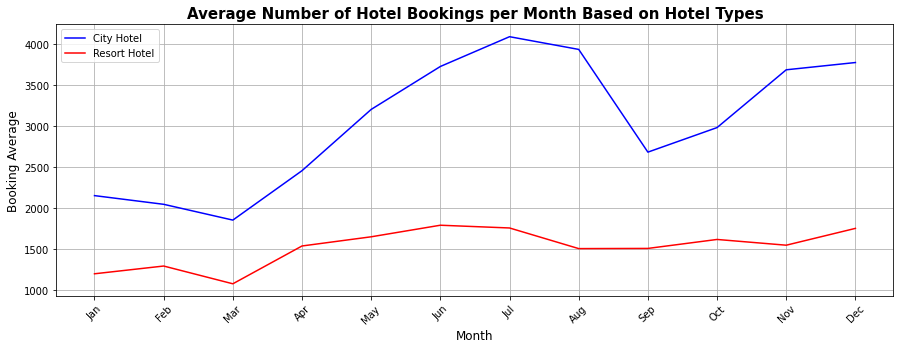

In [17]:
fig, ax1 = plt.subplots()
fig.set_size_inches(15, 5)

sns.lineplot(x='month', y='average_hotel_booking', data=hotel_arrival, hue='hotel_variety', palette = ['Blue', 'Red'], 
             hue_order=['City Hotel','Resort Hotel']).set(xlabel=None)
plt.ylabel('Booking Average', fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.title('Average Number of Hotel Bookings per Month Based on Hotel Types', fontsize = 15, fontweight = 'bold')
plt.grid()
plt.legend(loc='upper left')
plt.xticks(rotation=45)

- June and July are the months with the highest hotel bookings for each type of hotel. This happens because that month is the holiday season for student in Indonesia.
- There is another growth of hotel bookings of both hotel types in December. This is caused by several events such as Christmas, New Year, and school holidays.
- The lowest hotel bookings occurred in the period January - March. This happened because the holidays is over (students are returned to the school and workers are returned to work)

# Impact Analysis of Stay Duration of Hotel Bookings Cancellation Rates

In [18]:
dfc['stay_duration'].value_counts()

stay_duration
2     27632
3     27064
1     21005
4     17373
7      8648
5      7771
6      3846
8      1155
10     1135
14      913
9       840
11      393
12      220
13      141
15       72
21       71
16       40
25       37
18       35
28       34
19       22
17       20
20       14
22       13
29       13
30       13
23        8
26        6
24        6
35        5
42        4
27        4
33        3
56        2
38        1
48        1
46        1
45        1
69        1
60        1
34        1
Name: count, dtype: int64

In [19]:
duration_list = []
for i in dfc['stay_duration']:
    if i >= 1 and i <= 7:
        group = '1 Week'
    elif i >= 8 and i <= 14:
        group = '2 Weeks'
    elif i >= 15 and i <= 21:
        group = '3 Weeks'
    elif i >= 22 and i <= 28:
        group = '4 Weeks'
    else: 
        group = '> 4 Weeks'
    duration_list.append(group)
dfc['stay_duration_group'] = duration_list

In [20]:
dfc['stay_duration_group'].value_counts()

stay_duration_group
1 Week       113339
2 Weeks        4797
3 Weeks         274
4 Weeks         108
> 4 Weeks        47
Name: count, dtype: int64

In [21]:
df3 = dfc.groupby(['hotel', 'stay_duration_group', 'is_canceled']).agg({'agent':'count'}).reset_index()
df3.rename(columns={'agent':'num_booking'}, inplace = True)

# sum booking column
df_sum = df3.groupby(['hotel', 'stay_duration_group']).agg({'num_booking':'sum'}).reset_index()
df_sum.rename(columns={'num_booking':'sum_booking'}, inplace = True)
df3 = df3.merge(df_sum, on = ['hotel', 'stay_duration_group'])

# cancellation rate
df3['cancellation_rate'] = round((df3['num_booking']/df3['sum_booking'])*100, 2)
df3

,hotel,stay_duration_group,is_canceled,num_booking,sum_booking,cancellation_rate
0,City Hotel,1 Week,0,45287,77678,58.30
1,City Hotel,1 Week,1,32391,77678,41.70
2,City Hotel,2 Weeks,0,511,1069,47.80
3,City Hotel,2 Weeks,1,558,1069,52.20
4,City Hotel,3 Weeks,0,29,105,27.62
5,City Hotel,3 Weeks,1,76,105,72.38
6,City Hotel,4 Weeks,0,4,25,16.00
7,City Hotel,4 Weeks,1,21,25,84.00
8,City Hotel,> 4 Weeks,0,2,22,9.09
9,City Hotel,> 4 Weeks,1,20,22,90.91


In [22]:
# pick the data that hotels has been cancelled
df3_plot = df3[df3['is_canceled'] == 1].sort_values('stay_duration_group', ascending = True)
df3_plot

,hotel,stay_duration_group,is_canceled,num_booking,sum_booking,cancellation_rate
1,City Hotel,1 Week,1,32391,77678,41.70
11,Resort Hotel,1 Week,1,9907,35661,27.78
3,City Hotel,2 Weeks,1,558,1069,52.20
13,Resort Hotel,2 Weeks,1,1078,3728,28.92
5,City Hotel,3 Weeks,1,76,105,72.38
15,Resort Hotel,3 Weeks,1,79,169,46.75
7,City Hotel,4 Weeks,1,21,25,84.00
17,Resort Hotel,4 Weeks,1,39,83,46.99
9,City Hotel,> 4 Weeks,1,20,22,90.91
19,Resort Hotel,> 4 Weeks,1,7,25,28.00


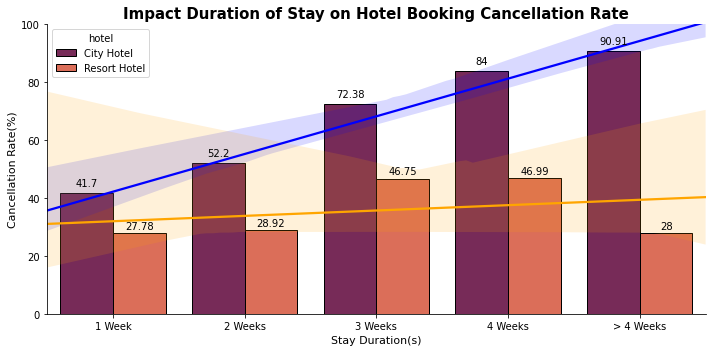

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Impact Duration of Stay on Hotel Booking Cancellation Rate", fontsize=15, color='black', weight='bold')
sns.barplot(x='stay_duration_group', y='cancellation_rate', data=df3_plot, hue='hotel', edgecolor='black', palette='rocket')

sns.regplot(x=np.arange(0, len(df3_plot[df3_plot['hotel'] == 'City Hotel'])), y='cancellation_rate', 
            data=df3_plot[df3_plot['hotel'] == 'City Hotel'], scatter=False, label = 'Trend City Hotel', color = 'blue', 
            truncate=False)
sns.regplot(x=np.arange(0, len(df3_plot[df3_plot['hotel'] == 'City Hotel'])), y='cancellation_rate', 
            data=df3_plot[df3_plot['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', color = 'orange',
            truncate=False)

plt.xlabel('Stay Duration(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)
plt.ylim(0, 100)

plt.bar_label(ax.containers[0], padding=5)
plt.bar_label(ax.containers[1], padding=2)

sns.despine()
plt.tight_layout()

- There is positive trend of cancellation rate of hotel bookings per stay duration based on hotel types. The higher the duration of stay, the higher the canceled hotel bookings.
- There are many possibilities this could happen, such as cancelled vacation plan due any reasons or choosing wrong hotel.

# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rates

In [35]:
dfc['lead_time'].value_counts()

lead_time
0      6007
1      3386
2      2042
3      1804
4      1697
       ... 
389       1
387       1
400       1
370       1
463       1
Name: count, Length: 478, dtype: int64

In [36]:
lead_time_list = []
for i in dfc['lead_time']:
    if i <= 30:
        lead_group = '1 Month'
    elif i >= 31 and i <= 60:
        lead_group = '2 Month'
    elif i >= 61 and i <= 90:
        lead_group = '3 Month'
    elif i >= 91 and i <= 120:
        lead_group ='4 Month'
    elif i >= 121 and i <= 150:
        lead_group = '5 Month'
    elif i >= 151 and i <= 180:
        lead_group = '6 Month'
    elif i >= 181 and i <= 210:
        lead_group = '7 Month'
    elif i >= 211 and i <= 240:
        lead_group = '8 Month'
    elif i >= 241 and i <= 270:
        lead_group = '9 Month'
    elif i >= 271 and i <= 300:
        lead_group = '10 Month'
    elif i >= 301 and i <= 330:
        lead_group = '11 Month'
    elif i >= 331 and i <= 360:
        lead_group = '12 Month'
    else:
        lead_group = '> 12 Month'
    lead_time_list.append(lead_group)
dfc['lead_time_group'] = lead_time_list

In [37]:
dfc['lead_time_group'].value_counts()

lead_time_group
1 Month       38094
2 Month       16896
3 Month       12541
4 Month       10414
5 Month        8126
6 Month        7844
7 Month        5649
8 Month        4303
10 Month       3419
> 12 Month     3412
9 Month        3400
11 Month       2754
12 Month       1713
Name: count, dtype: int64

In [38]:
df4 = dfc.groupby(['hotel', 'lead_time_group', 'is_canceled']).agg({'agent':'count'}).reset_index()
df4.rename(columns = {'agent' : 'num_booking'}, inplace = True)

# sum booking column
df_sum = df4.groupby(['hotel', 'lead_time_group']).agg({'num_booking':'sum'}).reset_index()
df_sum.rename(columns = {'num_booking':'sum_booking'}, inplace = True)
df4 = df4.merge(df_sum, on = ['hotel', 'lead_time_group'])

# cancellation rate
df4['cancellation_rate'] = round((df4['num_booking']/df4['sum_booking'])*100, 2)
df4

,hotel,lead_time_group,is_canceled,num_booking,sum_booking,cancellation_rate
0,City Hotel,1 Month,0,17848,23022,77.53
1,City Hotel,1 Month,1,5174,23022,22.47
2,City Hotel,10 Month,0,659,2518,26.17
3,City Hotel,10 Month,1,1859,2518,73.83
4,City Hotel,11 Month,0,514,2118,24.27
5,City Hotel,11 Month,1,1604,2118,75.73
6,City Hotel,12 Month,0,217,1221,17.77
7,City Hotel,12 Month,1,1004,1221,82.23
8,City Hotel,2 Month,0,7251,11858,61.15
9,City Hotel,2 Month,1,4607,11858,38.85


In [39]:
df4_plot = df4[df4['is_canceled'] == 1]
df4_plot

,hotel,lead_time_group,is_canceled,num_booking,sum_booking,cancellation_rate
1,City Hotel,1 Month,1,5174,23022,22.47
3,City Hotel,10 Month,1,1859,2518,73.83
5,City Hotel,11 Month,1,1604,2118,75.73
7,City Hotel,12 Month,1,1004,1221,82.23
9,City Hotel,2 Month,1,4607,11858,38.85
11,City Hotel,3 Month,1,3690,8890,41.51
13,City Hotel,4 Month,1,3486,7441,46.85
15,City Hotel,5 Month,1,2542,5603,45.37
17,City Hotel,6 Month,1,2716,5156,52.68
19,City Hotel,7 Month,1,1793,3590,49.94


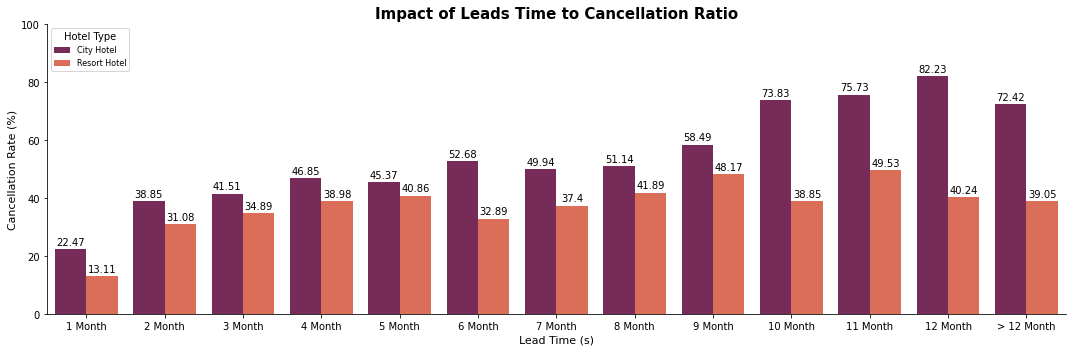

In [47]:
fig, ax = plt.subplots(figsize = (15, 5))
plt.title('Impact of Leads Time to Cancellation Ratio', fontsize = 15, weight = 'bold')
sns.barplot(x = 'lead_time_group', y = 'cancellation_rate', data = df4_plot, hue = 'hotel',  order = ['1 Month', '2 Month', 
            '3 Month', '4 Month', '5 Month', '6 Month', '7 Month', '8 Month', '9 Month', '10 Month', '11 Month', '12 Month',
           '> 12 Month'], palette ='rocket')

plt.xlabel('Lead Time (s)', fontsize = 11)
plt.ylabel('Cancellation Rate (%)', fontsize =11)
plt.ylim(0, 100)

plt.bar_label(ax.containers[0], padding = 2)
plt.bar_label(ax.containers[1], padding = 2)

plt.legend(title='Hotel Type', prop={'size':8}, loc='upper left')

sns.despine()
plt.tight_layout()

- Both types of hotels with the lowest cancellation rates of bookings are on 1 month lead time
- Both types of hotels with the highest cancellation rates of bookings are on 12 month lead time